# load data

In [106]:
import pandas as pd

In [17]:
pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [107]:
lag_analysis_cal=pd.read_csv('../data/features/no_lag_top10_correlation_by_gage.csv')

In [108]:
gage_class=pd.read_excel('../data/raw/streamflow/GAGES-II_ref_non_ref.xlsx')
gage_class.head()

,STAID,CLASS
0,1011000,Non-ref
1,1013500,Ref
2,1015800,Non-ref
3,1016500,Non-ref
4,1017000,Non-ref


In [109]:
gage_in_gslb=pd.read_csv('../data/raw/streamflow/gsl_nwm_gage.csv')
gage_in_gslb.head()

,id,name,River,latitude,longitude,elevation_m,state
0,10011200,WEST FORK BEAR RIVER AT WHITNEY DAM - NR OAKLE...,WEST FORK BEAR RIVER,40.841614,-110.927119,2797,Utah
1,10011500,BEAR RIVER NEAR UTAH-WYOMING STATE LINE,BEAR RIVER,40.965225,-110.853508,2432,Utah
2,10015700,SULPHUR CR.AB.RES.BL.LA CHAPELLE CR.NR EVANSTO...,SULPHUR CREEK,41.129114,-110.806563,2205,Wyoming
3,10015900,SULPHUR CREEK BL RES. - NEAR EVANSTON - WYO.,SULPHUR CREEK,41.156058,-110.835176,2173,Wyoming
4,10016900,BEAR RIVER AT EVANSTON - WY,BEAR RIVER,41.270224,-110.963793,2057,Wyoming


In [110]:
import pandas as pd

# Check the initial assignment
print("Loading gage_class from Excel file...")
try:
    gage_class = pd.read_excel('../data/raw/streamflow/GAGES-II_ref_non_ref.xlsx')
    print("Successfully loaded gage_class as DataFrame")
except Exception as e:
    print(f"Error loading gage_class: {e}")

# Check the type and value of gage_class
print(f"Type of gage_class after loading: {type(gage_class)}")
print(gage_class.head())

# Ensure gage_class is not overwritten
# Add similar checks throughout your code where gage_class is used


Loading gage_class from Excel file...
Successfully loaded gage_class as DataFrame
Type of gage_class after loading: <class 'pandas.core.frame.DataFrame'>
     STAID    CLASS
0  1011000  Non-ref
1  1013500      Ref
2  1015800  Non-ref
3  1016500  Non-ref
4  1017000  Non-ref


In [111]:
# Ensure the necessary columns are of string type for merging
gage_class['STAID'] = gage_class['STAID'].astype(str)
gage_in_gslb['id'] = gage_in_gslb['id'].astype(str)

# Merge gage_in_gslb with gage_class to include the class information
gage_in_gslb_with_class = gage_in_gslb.merge(
    gage_class[['STAID', 'CLASS']],
    left_on='id',
    right_on='STAID',
    how='left'
)

# Drop the duplicate STAID column and rename CLASS to lowercase
gage_in_gslb_with_class = gage_in_gslb_with_class.drop('STAID', axis=1)
gage_in_gslb_with_class = gage_in_gslb_with_class.rename(columns={'CLASS': 'class'})

# Calculate the total number of gages
total_gages = len(gage_in_gslb_with_class)

# Count the number of gages in each class
class_counts = gage_in_gslb_with_class['class'].value_counts()

# Calculate the percentage of gages in each class
class_percentages = (class_counts / total_gages) * 100

# Display the results
print("Number of gages in each class:")
print(class_counts)
print("\nPercentage of gages in each class:")
print(class_percentages.round(2), "%")


Number of gages in each class:
class
Non-ref    69
Ref         9
Name: count, dtype: int64

Percentage of gages in each class:
class
Non-ref    88.46
Ref        11.54
Name: count, dtype: float64 %


In [112]:
# Get the reference gages that are within the GSL basin
ref_gages_in_gslb = gage_in_gslb_with_class[gage_in_gslb_with_class['class'] == 'Ref']

# Display the reference gages in GSL basin with their details
ref_gages_in_gslb[['id', 'name', 'River', 'latitude', 'longitude', 'state', 'class']]

,id,name,River,latitude,longitude,state,class
7,10023000,BIG CREEK NEAR RANDOLPH - UT,BIG CREEK,41.609942,-111.254088,Utah,Ref
13,10041000,THOMAS FORK NEAR WYOMING-IDAHO STATE LINE,THOMAS FORK,42.402708,-111.025749,Wyoming,Ref
16,10058600,BLOOMINGTON CREEK AT BLOOMINGTON - ID,BLOOMINGTON CREEK,42.184650,-111.425763,Idaho,Ref
20,10093000,CUB RIVER NEAR PRESTON - ID,CUB RIVER,42.141037,-111.689388,Idaho,Ref
27,10109001,COM F LOGAN R AB ST D AND LO HP AND SM C N LO UT,COM FORK LOGAN RIVER,41.744375,-111.784387,Utah,Ref
51,10143500,CENTERVILLE CREEK ABV. DIV NEAR CENTERVILLE - UT,CENTERVILLE CREEK,40.916334,-111.862993,Utah,Ref
54,10148200,TIE FORK NEAR SOLDIER SUMMIT - UT,TIE FORK,39.949958,-111.216839,Utah,Ref
75,10172700,VERNON CREEK NEAR VERNON - UT,VERNON CREEK,39.979391,-112.380230,Utah,Ref
76,10172860,WARM CREEK NEAR GANDY - UT,WARM CREEK,39.459528,-114.023722,Utah,Ref


# plots

In [115]:
final_result_cleaned = pd.read_csv('../data/features/no_lag_top10_correlation_by_gage.csv')

In [62]:
# final_result_cleaned = pd.read_csv('../data/features/q_buffer2_pair_lag_3mo.csv')

In [116]:
final_result_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   well_id     9288 non-null   float64
 1   date        9288 non-null   object 
 2   wte         9288 non-null   float64
 3   gse         9288 non-null   float64
 4   gage_id     9288 non-null   int64  
 5   well_lat    9288 non-null   float64
 6   well_lon    9288 non-null   float64
 7   gage_lat    9288 non-null   float64
 8   gage_lon    9288 non-null   float64
 9   wte_meters  9288 non-null   float64
 10  q           9288 non-null   float64
 11  bfd         9288 non-null   float64
 12  delta_wte   9288 non-null   float64
 13  delta_q     9288 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1016.0+ KB


In [117]:
# Convert gage_id in both dataframes to string for merging
final_result_cleaned['gage_id'] = final_result_cleaned['gage_id'].astype(str)
gage_class['STAID'] = gage_class['STAID'].astype(str)

# Merge final_result_cleaned with gage_class to add CLASS column
final_result_cleaned = final_result_cleaned.merge(
    gage_class[['STAID', 'CLASS']],
    left_on='gage_id',
    right_on='STAID',
    how='left'
)

# Drop redundant STAID column and rename CLASS to lowercase
final_result_cleaned.drop('STAID', axis=1, inplace=True)
final_result_cleaned.rename(columns={'CLASS': 'class'}, inplace=True)


In [118]:
# Count the number of Non-ref and Ref gages
gage_counts = final_result_cleaned['class'].value_counts()

# Display the counts
print("Number of Non-ref gages:", gage_counts.get('Non-ref', 0))
print("Number of Ref gages:", gage_counts.get('Ref', 0))


Number of Non-ref gages: 9288
Number of Ref gages: 0


In [119]:
final_result_cleaned.head()

,well_id,date,wte,gse,gage_id,well_lat,well_lon,gage_lat,gage_lon,wte_meters,q,bfd,delta_wte,delta_q,class
0,3.948130e+14,1975-01-01,5948.189398,5955.0,10152000,39.803571,-111.489359,40.150232,-111.726039,1813.008129,96.0,1.0,0.000000,0.0,Non-ref
1,3.948130e+14,1975-01-02,5948.196858,5955.0,10152000,39.803571,-111.489359,40.150232,-111.726039,1813.010402,90.0,1.0,0.007460,-6.0,Non-ref
2,3.948130e+14,1975-01-03,5948.204262,5955.0,10152000,39.803571,-111.489359,40.150232,-111.726039,1813.012659,90.0,1.0,0.014864,-6.0,Non-ref
3,3.948130e+14,1975-01-04,5948.211606,5955.0,10152000,39.803571,-111.489359,40.150232,-111.726039,1813.014898,93.0,1.0,0.022208,-3.0,Non-ref
4,3.948130e+14,1975-01-05,5948.218889,5955.0,10152000,39.803571,-111.489359,40.150232,-111.726039,1813.017117,95.0,1.0,0.029491,-1.0,Non-ref


In [120]:
final_result_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   well_id     9288 non-null   float64
 1   date        9288 non-null   object 
 2   wte         9288 non-null   float64
 3   gse         9288 non-null   float64
 4   gage_id     9288 non-null   object 
 5   well_lat    9288 non-null   float64
 6   well_lon    9288 non-null   float64
 7   gage_lat    9288 non-null   float64
 8   gage_lon    9288 non-null   float64
 9   wte_meters  9288 non-null   float64
 10  q           9288 non-null   float64
 11  bfd         9288 non-null   float64
 12  delta_wte   9288 non-null   float64
 13  delta_q     9288 non-null   float64
 14  class       9288 non-null   object 
dtypes: float64(12), object(3)
memory usage: 1.1+ MB


In [ ]:
# # 高效的一次性数据准备和绘图 - ΔQ vs. lagged ΔWTE (1-year)
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import linregress
# import matplotlib.dates as mdates
# import os
# from matplotlib.patches import Patch
#
# print("=== 高效数据准备 - ΔQ vs. lagged ΔWTE (3-month) ===")
#
# # 检查数据是否已经有class列，避免重复merge
# if 'class' not in final_result_cleaned.columns:
#     print("添加class信息...")
#     # 确保数据类型一致
#     final_result_cleaned['gage_id'] = final_result_cleaned['gage_id'].astype(str)
#     gage_class['STAID'] = gage_class['STAID'].astype(str)
#
#     # Merge to add CLASS column
#     final_result_cleaned = final_result_cleaned.merge(
#         gage_class[['STAID', 'CLASS']],
#         left_on='gage_id',
#         right_on='STAID',
#         how='left'
#     )
#
#     # Clean up and rename
#     final_result_cleaned.drop('STAID', axis=1, inplace=True)
#     final_result_cleaned.rename(columns={'CLASS': 'class'}, inplace=True)
# else:
#     print("class列已存在，跳过merge...")
#
# # 一次性进行datetime转换
# if final_result_cleaned['date'].dtype == 'object':
#     print("转换日期格式...")
#     final_result_cleaned['date'] = pd.to_datetime(final_result_cleaned['date'])
#
# # 确保目录存在
# os.makedirs('../reports/lag_3mo/scatter_plots_delta_q_lag_delta_wte', exist_ok=True)
#
# # 高效的分组绘图
# print("开始生成散点图...")
# stats_data = []
# grouped = final_result_cleaned.groupby('gage_id')
#
# for gage_id, group in grouped:
#     # 一次性清理数据 - 使用lag变量
#     group = group.dropna(subset=['delta_wte_lag3_months', 'delta_q'])
#
#     if len(group) < 2:
#         continue
#
#     # 创建图表
#     plt.figure(figsize=(12, 6))
#
#     # 高效绘图 - 减少不必要的参数
#     sns.scatterplot(
#         data=group,
#         x='delta_wte_lag3_months',
#         y='delta_q',
#         hue='well_id',
#         palette='viridis',
#         legend=False,
#         alpha=0.6
#     )
#
#     # 回归分析
#     if len(group['delta_wte_lag3_months'].unique()) > 1:
#         slope, intercept, r_value, p_value, std_err = linregress(
#             group['delta_wte_lag3_months'], group['delta_q']
#         )
#
#         # 绘制回归线
#         x_range = [group['delta_wte_lag3_months'].min(), group['delta_wte_lag3_months'].max()]
#         y_range = [intercept + slope * x for x in x_range]
#         plt.plot(x_range, y_range, 'r-', linewidth=2)
#
#         # 获取class信息（安全方式）
#         class_value = group['class'].iloc[0] if len(group) > 0 and 'class' in group.columns else 'Unknown'
#
#         # 收集统计数据
#         stats_data.append({
#             'gage_id': gage_id,
#             'num_wells': group['well_id'].nunique(),
#             'num_measurements': len(group),
#             'slope': slope,
#             'intercept': intercept,
#             'r_squared': r_value ** 2,
#             'p_value': p_value,
#             'class': class_value
#         })
#
#         legend_text = (
#             f"Wells: {group['well_id'].nunique()}\n"
#             f"Measurements: {len(group)}\n"
#             f"Slope: {slope:.2f}\n"
#             f"R²: {r_value ** 2:.2f}\n"
#             f"p-value: {p_value:.4f}"
#         )
#     else:
#         legend_text = (
#             f"Wells: {group['well_id'].nunique()}\n"
#             f"Measurements: {len(group)}\n"
#             "No variation in lag delta_wte"
#         )
#
#     # 显示class信息
#     class_display = 'Unknown'
#     if 'class' in group.columns and len(group) > 0:
#         class_val = group['class'].iloc[0]
#         if class_val == 'Non-ref':
#             class_display = 'Unregulated'
#         elif class_val == 'Ref':
#             class_display = 'Regulated'
#         else:
#             class_display = str(class_val) if pd.notna(class_val) else 'Unknown'
#
#     # 设置图表
#     plt.title(f'Gage ID: {gage_id} - Class: {class_display}\nΔQ vs. lagged ΔWTE (3-month)', fontsize=16)
#     plt.xlabel('Lagged ΔWTE (ft, 3-month lag)')
#     plt.ylabel('ΔQ (cfs)')
#     plt.grid(True, alpha=0.3)
#
#     # 添加统计信息
#     plt.text(
#         0.98, 0.95, legend_text,
#         transform=plt.gca().transAxes,
#         fontsize=10, ha='right', va='top',
#         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
#     )
#
#     # 保存图表
#     plt.savefig(f'../reports/lag_3mo/scatter_plots_delta_q_lag_delta_wte/gage_{gage_id}.png',
#                 bbox_inches='tight', dpi=150)
#     plt.close()
#
# # 导出统计数据
# if stats_data:
#     stats_df = pd.DataFrame(stats_data)
#     stats_df.to_csv('../reports/lag_3mo/scatter_plots_delta_q_lag_delta_wte/scatter_delta_q_lag_delta_wte_statistics_3mo.csv', index=False)
#     print(f"生成了 {len(stats_data)} 个图表并保存统计数据")
# else:
#     print("没有足够的数据生成图表")
#
# print("绘图完成！")

In [85]:
# 高效的一次性数据准备和绘图 - ΔQ vs. ΔWTE (no lag)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.dates as mdates
import os
from matplotlib.patches import Patch

print("=== 高效数据准备 - ΔQ vs. ΔWTE (no lag) ===")

# 检查数据是否已经有class列，避免重复merge
if 'class' not in final_result_cleaned.columns:
    print("添加class信息...")
    # 确保数据类型一致
    final_result_cleaned['gage_id'] = final_result_cleaned['gage_id'].astype(str)
    gage_class['STAID'] = gage_class['STAID'].astype(str)
    
    # Merge to add CLASS column
    final_result_cleaned = final_result_cleaned.merge(
        gage_class[['STAID', 'CLASS']],
        left_on='gage_id',
        right_on='STAID',
        how='left'
    )
    
    # Clean up and rename
    final_result_cleaned.drop('STAID', axis=1, inplace=True)
    final_result_cleaned.rename(columns={'CLASS': 'class'}, inplace=True)
else:
    print("class列已存在，跳过merge...")

# 一次性进行datetime转换
if final_result_cleaned['date'].dtype == 'object':
    print("转换日期格式...")
    final_result_cleaned['date'] = pd.to_datetime(final_result_cleaned['date'])

# 确保目录存在
os.makedirs('../reports/no_lag/scatter_plots_delta_q_delta_wte', exist_ok=True)

# 高效的分组绘图
print("开始生成散点图...")
stats_data = []
grouped = final_result_cleaned.groupby('gage_id')

for gage_id, group in grouped:
    # 一次性清理数据 - 使用当前delta变量（无lag）
    group = group.dropna(subset=['delta_wte', 'delta_q'])
    
    if len(group) < 2:
        continue
        
    # 创建图表
    plt.figure(figsize=(12, 6))

    # 高效绘图 - 减少不必要的参数
    sns.scatterplot(
        data=group,
        x='delta_wte',
        y='delta_q',
        hue='well_id',
        palette='viridis',
        legend=False,
        alpha=0.6
    )

    # 回归分析
    if len(group['delta_wte'].unique()) > 1:
        slope, intercept, r_value, p_value, std_err = linregress(
            group['delta_wte'], group['delta_q']
        )

        # 绘制回归线
        x_range = [group['delta_wte'].min(), group['delta_wte'].max()]
        y_range = [intercept + slope * x for x in x_range]
        plt.plot(x_range, y_range, 'r-', linewidth=2)

        # 获取class信息（安全方式）
        class_value = group['class'].iloc[0] if len(group) > 0 and 'class' in group.columns else 'Unknown'

        # 收集统计数据
        stats_data.append({
            'gage_id': gage_id,
            'num_wells': group['well_id'].nunique(),
            'num_measurements': len(group),
            'slope': slope,
            'intercept': intercept,
            'r_squared': r_value ** 2,
            'p_value': p_value,
            'class': class_value
        })

        legend_text = (
            f"Wells: {group['well_id'].nunique()}\n"
            f"Measurements: {len(group)}\n"
            f"Slope: {slope:.2f}\n"
            f"R²: {r_value ** 2:.2f}\n"
            f"p-value: {p_value:.4f}"
        )
    else:
        legend_text = (
            f"Wells: {group['well_id'].nunique()}\n"
            f"Measurements: {len(group)}\n"
            "No variation in delta_wte"
        )

    # 显示class信息
    class_display = 'Unknown'
    if 'class' in group.columns and len(group) > 0:
        class_val = group['class'].iloc[0]
        if class_val == 'Non-ref':
            class_display = 'Unregulated'
        elif class_val == 'Ref':
            class_display = 'Regulated'
        else:
            class_display = str(class_val) if pd.notna(class_val) else 'Unknown'

    # 设置图表
    plt.title(f'Gage ID: {gage_id} - Class: {class_display}\nΔQ vs. ΔWTE (no lag)', fontsize=16)
    plt.xlabel('ΔWTE (ft)')
    plt.ylabel('ΔQ (cfs)')
    plt.grid(True, alpha=0.3)

    # 添加统计信息
    plt.text(
        0.98, 0.95, legend_text,
        transform=plt.gca().transAxes,
        fontsize=10, ha='right', va='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )

    # 保存图表
    plt.savefig(f'../reports/no_lag/scatter_plots_delta_q_delta_wte/gage_{gage_id}.png',
                bbox_inches='tight', dpi=150)
    plt.close()

# 导出统计数据
if stats_data:
    stats_df = pd.DataFrame(stats_data)
    stats_df.to_csv('../reports/no_lag/scatter_plots_delta_q_delta_wte/scatter_delta_q_delta_wte_statistics_no_lag.csv', index=False)
    print(f"生成了 {len(stats_data)} 个图表并保存统计数据")
else:
    print("没有足够的数据生成图表")

print("绘图完成！")

=== 高效数据准备 - ΔQ vs. ΔWTE (no lag) ===
class列已存在，跳过merge...
转换日期格式...
开始生成散点图...
生成了 4 个图表并保存统计数据
绘图完成！


### top 25%

In [122]:
final_result_cleaned = pd.read_csv('../data/features/no_lag_top25_correlation_by_gage.csv')

In [123]:
# 高效的一次性数据准备和绘图 - ΔQ vs. ΔWTE (no lag) - Top 10% Correlation Wells
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.dates as mdates
import os
from matplotlib.patches import Patch


print("=== 高效数据准备 - ΔQ vs. ΔWTE (no lag) - Top 25% Correlation Wells ===")

# 检查数据是否已经有class列，避免重复merge
if 'class' not in final_result_cleaned.columns:
    print("添加class信息...")
    # 确保数据类型一致
    final_result_cleaned['gage_id'] = final_result_cleaned['gage_id'].astype(str)
    gage_class['STAID'] = gage_class['STAID'].astype(str)

    # Merge to add CLASS column
    final_result_cleaned = final_result_cleaned.merge(
        gage_class[['STAID', 'CLASS']],
        left_on='gage_id',
        right_on='STAID',
        how='left'
    )

    # Clean up and rename
    final_result_cleaned.drop('STAID', axis=1, inplace=True)
    final_result_cleaned.rename(columns={'CLASS': 'class'}, inplace=True)
else:
    print("class列已存在，跳过merge...")

# 一次性进行datetime转换
if final_result_cleaned['date'].dtype == 'object':
    print("转换日期格式...")
    final_result_cleaned['date'] = pd.to_datetime(final_result_cleaned['date'])

# 确保目录存在
os.makedirs('../reports/pct25/scatter_plots_delta_q_delta_wte', exist_ok=True)

# 高效的分组绘图
print("开始生成散点图...")
stats_data = []
grouped = final_result_cleaned.groupby('gage_id')

for gage_id, group in grouped:
    # 一次性清理数据 - 使用当前delta变量（无lag）
    group = group.dropna(subset=['delta_wte', 'delta_q'])

    if len(group) < 2:
        continue

    # 创建图表
    plt.figure(figsize=(12, 6))

    # 高效绘图 - 减少不必要的参数
    sns.scatterplot(
        data=group,
        x='delta_wte',
        y='delta_q',
        hue='well_id',
        palette='viridis',
        legend=False,
        alpha=0.6
    )

    # 回归分析
    if len(group['delta_wte'].unique()) > 1:
        slope, intercept, r_value, p_value, std_err = linregress(
            group['delta_wte'], group['delta_q']
        )

        # 绘制回归线
        x_range = [group['delta_wte'].min(), group['delta_wte'].max()]
        y_range = [intercept + slope * x for x in x_range]
        plt.plot(x_range, y_range, 'r-', linewidth=2)

        # 获取class信息（安全方式）
        class_value = group['class'].iloc[0] if len(group) > 0 and 'class' in group.columns else 'Unknown'

        # 收集统计数据
        stats_data.append({
            'gage_id': gage_id,
            'num_wells': group['well_id'].nunique(),
            'num_measurements': len(group),
            'slope': slope,
            'intercept': intercept,
            'r_squared': r_value ** 2,
            'p_value': p_value,
            'class': class_value
        })

        legend_text = (
            f"Top 10% Wells: {group['well_id'].nunique()}\n"
            f"Measurements: {len(group)}\n"
            f"Slope: {slope:.2f}\n"
            f"R²: {r_value ** 2:.2f}\n"
            f"p-value: {p_value:.4f}"
        )
    else:
        legend_text = (
            f"Top 10% Wells: {group['well_id'].nunique()}\n"
            f"Measurements: {len(group)}\n"
            "No variation in delta_wte"
        )

    # 显示class信息
    class_display = 'Unknown'
    if 'class' in group.columns and len(group) > 0:
        class_val = group['class'].iloc[0]
        if class_val == 'Non-ref':
            class_display = 'Unregulated'
        elif class_val == 'Ref':
            class_display = 'Regulated'
        else:
            class_display = str(class_val) if pd.notna(class_val) else 'Unknown'

    # 设置图表
    plt.title(f'Gage ID: {gage_id} - Class: {class_display}\nΔQ vs. ΔWTE (no lag) - Top 25% Correlation Wells', fontsize=16)
    plt.xlabel('ΔWTE (ft)')
    plt.ylabel('ΔQ (cfs)')
    plt.grid(True, alpha=0.3)

    # 添加统计信息
    plt.text(
        0.98, 0.95, legend_text,
        transform=plt.gca().transAxes,
        fontsize=10, ha='right', va='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )

    # 保存图表
    plt.savefig(f'../reports/pct25/scatter_plots_delta_q_delta_wte/gage_{gage_id}_top25.png',
                bbox_inches='tight', dpi=150)
    plt.close()

# 导出统计数据
if stats_data:
    stats_df = pd.DataFrame(stats_data)
    stats_df.to_csv('../reports/pct25/scatter_plots_delta_q_delta_wte/scatter_delta_q_delta_wte_statistics_top25.csv', index=False)
    print(f"生成了 {len(stats_data)} 个图表并保存统计数据")
else:
    print("没有足够的数据生成图表")

print("绘图完成！")

=== 高效数据准备 - ΔQ vs. ΔWTE (no lag) - Top 25% Correlation Wells ===
添加class信息...
转换日期格式...
开始生成散点图...
生成了 4 个图表并保存统计数据
绘图完成！


## Monthly

### time series

In [31]:
final_result_cleaned.head()

,well_id,date,wte,gse,gage_id,well_lat,well_lon,gage_lat,gage_lon,wte_meters,q,bfd,delta_wte,delta_q,date_prev,delta_wte_lag1_year,class
0,411605111481601,1933-08-08,4830.264808,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1472.264713,16.0,1.0,-3.545192,-22.0,1932-08-08,0.000000,Non-ref
1,411605111481601,1933-08-09,4830.250000,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1472.260200,15.0,1.0,-3.560000,-23.0,1932-08-09,-0.002727,Non-ref
2,411605111481601,1933-08-10,4830.230000,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1472.254104,14.0,1.0,-3.580000,-24.0,1932-08-10,-0.005370,Non-ref
3,411605111481601,1933-08-11,4830.205238,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1472.246557,12.0,1.0,-3.604762,-26.0,1932-08-11,-0.007930,Non-ref
4,411605111481601,1933-08-12,4830.178571,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1472.238429,12.0,1.0,-3.631429,-26.0,1932-08-12,-0.010409,Non-ref


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# Ensure the plots directory exists
os.makedirs('../reports/lag_1yr/monthly/subplot_q_lag_delta_wte_monthly', exist_ok=True)

# Prepare a list to collect statistical data for CSV
stats_data = []

# Assuming final_result_cleaned is already loaded as a DataFrame
# Group by gage_id
grouped = final_result_cleaned.groupby('gage_id')

# Iterate over each group
for gage_id, group in grouped:
    # Drop NaN values (changed to use lag variable)
    group = group.dropna(subset=['delta_wte_lag1_year', 'date', 'delta_q'])

    # Convert date to datetime format
    group['date'] = pd.to_datetime(group['date'])

    # Extract month from date
    group['month'] = group['date'].dt.month
    group['month_name'] = group['date'].dt.strftime('%B')

    # Sort by date to ensure the line plot is correct
    group = group.sort_values('date')

    # Get unique months in the data
    unique_months = sorted(group['month'].unique())

    # Skip if no monthly data
    if len(unique_months) == 0:
        continue

    # Create plots for each month
    for month in unique_months:
        # Filter data for current month
        monthly_data = group[group['month'] == month].copy()
        month_name = monthly_data['month_name'].iloc[0]

        # Skip if insufficient data for this month
        if len(monthly_data) < 2:
            continue

        # Create subplots (Delta Q on top, Lagged Delta WTE on bottom)
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

        # Plot delta_q vs. date on the top subplot
        ax1.scatter(monthly_data['date'], monthly_data['delta_q'], color='orange', label='Delta Q (cfs)', alpha=0.6)

        # Perform linear regression for delta_q
        if len(monthly_data) > 1 and len(monthly_data['date'].unique()) > 1:
            monthly_data['date_numeric'] = monthly_data['date'].map(pd.Timestamp.toordinal)
            slope_delta_q, intercept_delta_q, r_value_delta_q, p_value_delta_q, std_err_delta_q = linregress(
                monthly_data['date_numeric'], monthly_data['delta_q']
            )

            # Plot the regression line for delta_q
            ax1.plot(monthly_data['date'],
                    intercept_delta_q + slope_delta_q * monthly_data['date_numeric'],
                    'r', label='Fitted line for Delta Q')

            # Prepare legend text for delta_q
            legend_text_delta_q = (
                f"Delta Q Points: {len(monthly_data)}\n"
                f"Slope Delta Q: {slope_delta_q:.6f}\n"
                f"R² Delta Q: {r_value_delta_q ** 2:.2f}\n"
                f"P-value Delta Q: {p_value_delta_q:.4f}"
            )
        else:
            slope_delta_q = r_value_delta_q = p_value_delta_q = None
            legend_text_delta_q = (
                f"Delta Q Points: {len(monthly_data)}\n"
                "Insufficient data for regression"
            )

        ax1.set_ylabel('Delta Q (cfs)')
        ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

        # Add a custom legend with statistical data for delta_q
        ax1.text(
            0.05, 0.95,
            legend_text_delta_q,
            transform=ax1.transAxes,
            fontsize=10,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
        )

        # Plot lagged delta_wte vs. date on the bottom subplot
        ax2.scatter(monthly_data['date'], monthly_data['delta_wte_lag1_year'], color='blue', label='Lagged Delta WTE', alpha=0.6)

        # Perform linear regression for lagged delta_wte
        if len(monthly_data) > 1 and len(monthly_data['date'].unique()) > 1:
            slope_lag_wte, intercept_lag_wte, r_value_lag_wte, p_value_lag_wte, std_err_lag_wte = linregress(
                monthly_data['date_numeric'], monthly_data['delta_wte_lag1_year']
            )

            # Plot the regression line for lagged delta_wte
            ax2.plot(monthly_data['date'],
                    intercept_lag_wte + slope_lag_wte * monthly_data['date_numeric'],
                    'r', label='Fitted line for Lagged Delta WTE')

            # Collect statistics (updated variable names)
            stats_data.append({
                'gage_id': gage_id,
                'month': month,
                'month_name': month_name,
                'num_wells': monthly_data['well_id'].nunique(),
                'num_measurements': len(monthly_data),
                'slope_delta_q': slope_delta_q,
                'r_squared_delta_q': r_value_delta_q ** 2 if r_value_delta_q is not None else None,
                'p_value_delta_q': p_value_delta_q,
                'slope_lag_wte': slope_lag_wte,
                'r_squared_lag_wte': r_value_lag_wte ** 2,
                'p_value_lag_wte': p_value_lag_wte
            })

            # Prepare legend text for lagged delta_wte
            legend_text_lag_wte = (
                f"Wells: {monthly_data['well_id'].nunique()}\n"
                f"Measurements: {len(monthly_data)}\n"
                f"Slope Lagged WTE: {slope_lag_wte:.6f}\n"
                f"R² Lagged WTE: {r_value_lag_wte ** 2:.2f}\n"
                f"P-value Lagged WTE: {p_value_lag_wte:.4f}"
            )
        else:
            legend_text_lag_wte = (
                f"Wells: {monthly_data['well_id'].nunique()}\n"
                f"Measurements: {len(monthly_data)}\n"
                "Insufficient data for regression"
            )

        ax2.set_ylabel('Lagged ΔWTE (ft, previous year)')
        ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

        # Add a custom legend with statistical data for lagged delta_wte
        ax2.text(
            0.05, 0.95,
            legend_text_lag_wte,
            transform=ax2.transAxes,
            fontsize=10,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
        )

        # Set a single title for both subplots, closer to the plots (updated title)
        fig.suptitle(f'Gage ID: {gage_id} - {month_name} - ΔQ and Lagged ΔWTE (1-year) vs. Time',
                    fontsize=16, y=0.92)

        # Format the date axis
        ax2.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
        ax2.xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
        plt.xticks(rotation=45)

        # Save the plot (updated filename)
        plt.savefig(f'../reports/lag_1yr/monthly/subplot_q_lag_delta_wte_monthly/gage_{gage_id}_{month:02d}_{month_name}.png',
                   bbox_inches='tight')
        plt.close()

# Export statistics to CSV (updated filename)
if stats_data:
    stats_df = pd.DataFrame(stats_data)
    stats_df.to_csv('../reports/lag_1yr/monthly/delta_q_lag_delta_wte_monthly_statistics.csv', index=False)

    # Calculate monthly statistics (updated variable names)
    print("Monthly Summary Statistics:")
    for month_name in sorted(stats_df['month_name'].unique()):
        month_data = stats_df[stats_df['month_name'] == month_name]

        print(f"\n{month_name}:")
        print(f"  Number of gages: {len(month_data)}")
        print(f"  Average R² Delta Q: {month_data['r_squared_delta_q'].mean():.3f}")
        print(f"  Average R² Lagged WTE: {month_data['r_squared_lag_wte'].mean():.3f}")
        print(f"  Positive slope Delta Q: {(month_data['slope_delta_q'] > 0).mean() * 100:.1f}%")
        print(f"  Positive slope Lagged WTE: {(month_data['slope_lag_wte'] > 0).mean() * 100:.1f}%")

    # Overall statistics (updated variable names)
    overall_positive_delta_q = (stats_df['slope_delta_q'] > 0).mean() * 100
    overall_positive_lag_wte = (stats_df['slope_lag_wte'] > 0).mean() * 100

    print(f"\nOverall Statistics:")
    print(f"Total gage-month combinations: {len(stats_df)}")
    print(f"Percentage of positive slopes for Delta Q: {overall_positive_delta_q:.2f}%")
    print(f"Percentage of positive slopes for Lagged WTE: {overall_positive_lag_wte:.2f}%")

else:
    print("No statistical data collected - insufficient data for regression analysis")

Monthly Summary Statistics:

April:
  Number of gages: 5
  Average R² Delta Q: 0.058
  Average R² Lagged WTE: 0.039
  Positive slope Delta Q: 40.0%
  Positive slope Lagged WTE: 0.0%

August:
  Number of gages: 6
  Average R² Delta Q: 0.057
  Average R² Lagged WTE: 0.044
  Positive slope Delta Q: 33.3%
  Positive slope Lagged WTE: 16.7%

December:
  Number of gages: 6
  Average R² Delta Q: 0.069
  Average R² Lagged WTE: 0.050
  Positive slope Delta Q: 33.3%
  Positive slope Lagged WTE: 16.7%

February:
  Number of gages: 6
  Average R² Delta Q: 0.072
  Average R² Lagged WTE: 0.056
  Positive slope Delta Q: 50.0%
  Positive slope Lagged WTE: 16.7%

January:
  Number of gages: 6
  Average R² Delta Q: 0.069
  Average R² Lagged WTE: 0.053
  Positive slope Delta Q: 33.3%
  Positive slope Lagged WTE: 16.7%

July:
  Number of gages: 6
  Average R² Delta Q: 0.042
  Average R² Lagged WTE: 0.042
  Positive slope Delta Q: 16.7%
  Positive slope Lagged WTE: 16.7%

June:
  Number of gages: 6
  Avera

### scatter plots

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import os

# Ensure output directory exists
os.makedirs('../reports/lag_2yr/monthly/scatter_plots_delta_q_vs_lag_delta_wte', exist_ok=True)

# Load data - use lag data instead
final_result_cleaned = pd.read_csv('../data/features/q_buffer2_pair_lag_2yr.csv')
gage_class = pd.read_excel('../data/raw/streamflow/GAGES-II_ref_non_ref.xlsx')

# Merge gage classification information
final_result_cleaned['gage_id'] = final_result_cleaned['gage_id'].astype(str)
gage_class['STAID'] = gage_class['STAID'].astype(str)

final_result_cleaned = final_result_cleaned.merge(
    gage_class[['STAID', 'CLASS']],
    left_on='gage_id',
    right_on='STAID',
    how='left'
)

final_result_cleaned.drop('STAID', axis=1, inplace=True)
final_result_cleaned.rename(columns={'CLASS': 'class'}, inplace=True)

# Add month information
final_result_cleaned['date'] = pd.to_datetime(final_result_cleaned['date'])
final_result_cleaned['month'] = final_result_cleaned['date'].dt.month

# Month name mapping
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Prepare statistics collection
stats_data = []

# Group by gage_id
grouped = final_result_cleaned.groupby('gage_id')

# Create monthly scatter plots for each gage
for gage_id, group in grouped:
    group = group.dropna(subset=['delta_wte_lag2_year', 'delta_q'])

    # Check if enough data is available
    if len(group) < 2:
        continue

    plt.figure(figsize=(15, 10))

    # Get available months for this gage
    available_months = sorted(group['month'].unique())

    # Adjust subplot layout based on number of months
    if len(available_months) <= 4:
        rows, cols = 2, 2
    elif len(available_months) <= 6:
        rows, cols = 2, 3
    elif len(available_months) <= 9:
        rows, cols = 3, 3
    else:
        rows, cols = 3, 4

    fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
    if rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    axes = axes.flatten()

    # Map class display names
    if 'class' in group.columns and not group['class'].isna().all():
        class_display = group['class'].iloc[0]
        if class_display == 'Non-ref':
            class_display = 'Unregulated'
        elif class_display == 'Ref':
            class_display = 'Regulated'
    else:
        class_display = 'Unknown'

    # Create scatter plots for each month
    for idx, month in enumerate(available_months):
        if idx >= len(axes):
            break

        ax = axes[idx]
        month_data = group[group['month'] == month]

        if len(month_data) == 0:
            ax.set_visible(False)
            continue

        # Plot scatter with different colors for each well
        sns.scatterplot(
            data=month_data,
            x='delta_wte_lag2_year',
            y='delta_q',
            hue='well_id',
            palette='viridis',
            edgecolor='none',
            legend=False,
            ax=ax
        )

        legend_text = ""

        # Perform linear regression if enough data points
        if len(month_data) >= 2 and len(month_data['delta_wte_lag2_year'].unique()) > 1:
            slope, intercept, r_value, p_value, std_err = linregress(
                month_data['delta_wte_lag2_year'], month_data['delta_q']
            )

            # Plot regression line
            lag_delta_wte_range = pd.Series(month_data['delta_wte_lag2_year'].unique()).sort_values()
            ax.plot(lag_delta_wte_range, intercept + slope * lag_delta_wte_range, 'r', linewidth=2)

            # Collect statistics
            stats_data.append({
                'gage_id': gage_id,
                'month': month,
                'month_name': month_names[month],
                'num_wells': month_data['well_id'].nunique(),
                'num_measurements': len(month_data),
                'slope': slope,
                'intercept': intercept,
                'r_squared': r_value ** 2,
                'p_value': p_value,
                'class': class_display
            })

            legend_text = (
                f"Wells: {month_data['well_id'].nunique()}\n"
                f"Measurements: {len(month_data)}\n"
                f"Slope: {slope:.2f}\n"
                f"R²: {r_value ** 2:.2f}\n"
                f"p-value: {p_value:.4f}"
            )
        else:
            if len(month_data['delta_wte_lag2_year'].unique()) == 1:
                legend_text = (
                    f"Wells: {month_data['well_id'].nunique()}\n"
                    f"Measurements: {len(month_data)}\n"
                    "All lag delta_wte identical\nNo regression"
                )
            else:
                legend_text = (
                    f"Wells: {month_data['well_id'].nunique()}\n"
                    f"Measurements: {len(month_data)}\n"
                    "Not enough data"
                )

        # Set subplot labels and title
        ax.set_title(f'{month_names[month]}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Lagged ΔWTE (ft, 2-year lag)', fontsize=10)
        ax.set_ylabel('ΔQ (cfs)', fontsize=10)

        # Add grid
        ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax.xaxis.grid(False)
        ax.set_facecolor('white')

        # Add statistics text box
        ax.text(
            0.98, 0.95,
            legend_text,
            transform=ax.transAxes,
            fontsize=8,
            ha='right',
            va='top',
            linespacing=1.2,
            bbox=dict(
                facecolor='white',
                edgecolor='black',
                alpha=0.75,
                boxstyle='square,pad=0.3'
            )
        )

    # Hide unused subplots
    for idx in range(len(available_months), len(axes)):
        axes[idx].set_visible(False)

    # Set main title
    fig.suptitle(f'Gage ID: {gage_id} - Class: {class_display}\nΔQ vs Lagged ΔWTE (2-year) by Month',
                 fontsize=16, fontweight='bold', y=0.95)

    # Adjust layout and save plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.savefig(f'../reports/lag_2yr/monthly/scatter_plots_delta_q_vs_lag_delta_wte/gage_{gage_id}_monthly.png',
                bbox_inches='tight', dpi=300)
    plt.close()

# Export statistics
if stats_data:
    stats_df = pd.DataFrame(stats_data)
    stats_df.to_csv('../reports/lag_2yr/monthly/scatter_delta_q_vs_lag_delta_wte_monthly_statistics_2yr.csv', index=False)

    # Calculate summary statistics
    print(f"Generated monthly scatter plots for {len(grouped)} gages")
    print(f"Total monthly analyses: {len(stats_data)}")

    # Monthly statistics
    monthly_summary = stats_df.groupby('month_name').agg({
        'gage_id': 'count',
        'slope': ['mean', 'std'],
        'r_squared': ['mean', 'std'],
        'p_value': lambda x: (x < 0.05).sum()
    }).round(4)

    print("\nMonthly Summary:")
    print(monthly_summary)

    # Class statistics
    if 'class' in stats_df.columns:
        class_summary = stats_df.groupby('class').agg({
            'gage_id': 'count',
            'slope': ['mean', 'std'],
            'r_squared': ['mean', 'std'],
            'p_value': lambda x: (x < 0.05).sum()
        }).round(4)

        print("\nClass Summary:")
        print(class_summary)
else:
    print("No valid data found for analysis")

Generated monthly scatter plots for 6 gages
Total monthly analyses: 71

Monthly Summary:
           gage_id   slope         r_squared          p_value
             count    mean     std      mean     std <lambda>
month_name                                                   
April            6 -0.6098  2.1224    0.0303  0.0387        5
August           6  0.3750  0.7594    0.0140  0.0146        6
December         6 -0.0170  0.5763    0.0208  0.0380        5
February         6 -0.1023  0.5915    0.0256  0.0407        5
January          6 -0.1599  0.7807    0.0252  0.0369        5
July             6  0.2798  0.8094    0.0117  0.0105        6
June             6  0.2785  0.7760    0.0116  0.0136        5
March            6 -0.9129  3.1803    0.0454  0.0552        5
May              5  0.1617  1.1748    0.0126  0.0109        4
November         6  0.0558  1.0040    0.0256  0.0322        6
October          6  0.2122  0.7608    0.0156  0.0208        6
September        6  0.2681  0.6633    0.016

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

# Seasonal

### time series

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# Ensure the plots directory exists
os.makedirs('../reports/lag_1yr/seasonal/subplot_delta_q_lag_delta_wte_seasonal', exist_ok=True)

# Prepare a list to collect statistical data for CSV
stats_data = []

# Define season mapping function
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Assuming final_result_cleaned is already loaded as a DataFrame
# Group by gage_id
grouped = final_result_cleaned.groupby('gage_id')

# Iterate over each group
for gage_id, group in grouped:
    # Drop NaN values (changed to use lag variable)
    group = group.dropna(subset=['delta_wte_lag1_year', 'date', 'delta_q'])

    # Convert date to datetime format
    group['date'] = pd.to_datetime(group['date'])

    # Extract month and season from date
    group['month'] = group['date'].dt.month
    group['season'] = group['month'].apply(get_season)

    # Sort by date to ensure the line plot is correct
    group = group.sort_values('date')

    # Get unique seasons in the data
    unique_seasons = sorted(group['season'].unique())

    # Skip if no seasonal data
    if len(unique_seasons) == 0:
        continue

    # Create plots for each season
    for season in unique_seasons:
        # Filter data for current season
        seasonal_data = group[group['season'] == season].copy()

        # Skip if insufficient data for this season
        if len(seasonal_data) < 2:
            continue

        # Create subplots (Delta Q on top, Lagged Delta WTE on bottom)
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

        # Plot delta_q vs. date on the top subplot
        ax1.scatter(seasonal_data['date'], seasonal_data['delta_q'], color='orange', label='Delta Q (cfs)', alpha=0.6)

        # Perform linear regression for delta_q
        if len(seasonal_data) > 1 and len(seasonal_data['date'].unique()) > 1:
            seasonal_data['date_numeric'] = seasonal_data['date'].map(pd.Timestamp.toordinal)
            slope_delta_q, intercept_delta_q, r_value_delta_q, p_value_delta_q, std_err_delta_q = linregress(
                seasonal_data['date_numeric'], seasonal_data['delta_q']
            )

            # Plot the regression line for delta_q
            ax1.plot(seasonal_data['date'],
                    intercept_delta_q + slope_delta_q * seasonal_data['date_numeric'],
                    'r', label='Fitted line for Delta Q')

            # Prepare legend text for delta_q
            legend_text_delta_q = (
                f"Delta Q Points: {len(seasonal_data)}\n"
                f"Slope Delta Q: {slope_delta_q:.6f}\n"
                f"R² Delta Q: {r_value_delta_q ** 2:.2f}\n"
                f"P-value Delta Q: {p_value_delta_q:.4f}"
            )
        else:
            slope_delta_q = r_value_delta_q = p_value_delta_q = None
            legend_text_delta_q = (
                f"Delta Q Points: {len(seasonal_data)}\n"
                "Insufficient data for regression"
            )

        ax1.set_ylabel('Delta Q (cfs)')
        ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

        # Add a custom legend with statistical data for delta_q
        ax1.text(
            0.05, 0.95,
            legend_text_delta_q,
            transform=ax1.transAxes,
            fontsize=10,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
        )

        # Plot lagged delta_wte vs. date on the bottom subplot
        ax2.scatter(seasonal_data['date'], seasonal_data['delta_wte_lag1_year'], color='blue', label='Lagged Delta WTE', alpha=0.6)

        # Perform linear regression for lagged delta_wte
        if len(seasonal_data) > 1 and len(seasonal_data['date'].unique()) > 1:
            slope_lag_wte, intercept_lag_wte, r_value_lag_wte, p_value_lag_wte, std_err_lag_wte = linregress(
                seasonal_data['date_numeric'], seasonal_data['delta_wte_lag1_year']
            )

            # Plot the regression line for lagged delta_wte
            ax2.plot(seasonal_data['date'],
                    intercept_lag_wte + slope_lag_wte * seasonal_data['date_numeric'],
                    'r', label='Fitted line for Lagged Delta WTE')

            # Collect statistics (updated variable names)
            stats_data.append({
                'gage_id': gage_id,
                'season': season,
                'num_wells': seasonal_data['well_id'].nunique(),
                'num_measurements': len(seasonal_data),
                'slope_delta_q': slope_delta_q,
                'r_squared_delta_q': r_value_delta_q ** 2 if r_value_delta_q is not None else None,
                'p_value_delta_q': p_value_delta_q,
                'slope_lag_wte': slope_lag_wte,
                'r_squared_lag_wte': r_value_lag_wte ** 2,
                'p_value_lag_wte': p_value_lag_wte
            })

            # Prepare legend text for lagged delta_wte
            legend_text_lag_wte = (
                f"Wells: {seasonal_data['well_id'].nunique()}\n"
                f"Measurements: {len(seasonal_data)}\n"
                f"Slope Lagged WTE: {slope_lag_wte:.6f}\n"
                f"R² Lagged WTE: {r_value_lag_wte ** 2:.2f}\n"
                f"P-value Lagged WTE: {p_value_lag_wte:.4f}"
            )
        else:
            legend_text_lag_wte = (
                f"Wells: {seasonal_data['well_id'].nunique()}\n"
                f"Measurements: {len(seasonal_data)}\n"
                "Insufficient data for regression"
            )

        ax2.set_ylabel('Lagged ΔWTE (ft, previous year)')
        ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

        # Add a custom legend with statistical data for lagged delta_wte
        ax2.text(
            0.05, 0.95,
            legend_text_lag_wte,
            transform=ax2.transAxes,
            fontsize=10,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
        )

        # Set a single title for both subplots, closer to the plots (updated title)
        fig.suptitle(f'Gage ID: {gage_id} - {season} - ΔQ and Lagged ΔWTE (1-year) vs. Time',
                    fontsize=16, y=0.92)

        # Format the date axis
        ax2.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
        ax2.xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
        plt.xticks(rotation=45)

        # Save the plot (updated filename and path)
        plt.savefig(f'../reports/lag_1yr/seasonal/subplot_delta_q_lag_delta_wte_seasonal/gage_{gage_id}_{season}.png',
                   bbox_inches='tight')
        plt.close()

# Export statistics to CSV (updated filename)
if stats_data:
    stats_df = pd.DataFrame(stats_data)
    stats_df.to_csv('../reports/lag_1yr/seasonal/delta_q_lag_delta_wte_seasonal_statistics.csv', index=False)

    # Calculate seasonal statistics (updated variable names)
    print("Seasonal Summary Statistics:")
    for season in sorted(stats_df['season'].unique()):
        season_data = stats_df[stats_df['season'] == season]

        print(f"\n{season}:")
        print(f"  Number of gages: {len(season_data)}")
        print(f"  Average R² Delta Q: {season_data['r_squared_delta_q'].mean():.3f}")
        print(f"  Average R² Lagged WTE: {season_data['r_squared_lag_wte'].mean():.3f}")
        print(f"  Positive slope Delta Q: {(season_data['slope_delta_q'] > 0).mean() * 100:.1f}%")
        print(f"  Positive slope Lagged WTE: {(season_data['slope_lag_wte'] > 0).mean() * 100:.1f}%")

    # Overall statistics (updated variable names)
    overall_positive_delta_q = (stats_df['slope_delta_q'] > 0).mean() * 100
    overall_positive_lag_wte = (stats_df['slope_lag_wte'] > 0).mean() * 100

    print(f"\nOverall Statistics:")
    print(f"Total gage-season combinations: {len(stats_df)}")
    print(f"Percentage of positive slopes for Delta Q: {overall_positive_delta_q:.2f}%")
    print(f"Percentage of positive slopes for Lagged WTE: {overall_positive_lag_wte:.2f}%")

else:
    print("No statistical data collected - insufficient data for regression analysis")

Seasonal Summary Statistics:

Fall:
  Number of gages: 6
  Average R² Delta Q: 0.049
  Average R² Lagged WTE: 0.049
  Positive slope Delta Q: 33.3%
  Positive slope Lagged WTE: 16.7%

Spring:
  Number of gages: 6
  Average R² Delta Q: 0.030
  Average R² Lagged WTE: 0.047
  Positive slope Delta Q: 66.7%
  Positive slope Lagged WTE: 16.7%

Summer:
  Number of gages: 6
  Average R² Delta Q: 0.046
  Average R² Lagged WTE: 0.046
  Positive slope Delta Q: 33.3%
  Positive slope Lagged WTE: 16.7%

Winter:
  Number of gages: 6
  Average R² Delta Q: 0.069
  Average R² Lagged WTE: 0.053
  Positive slope Delta Q: 33.3%
  Positive slope Lagged WTE: 16.7%

Overall Statistics:
Total gage-season combinations: 24
Percentage of positive slopes for Delta Q: 41.67%
Percentage of positive slopes for Lagged WTE: 16.67%


## scatter plots

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import os

# Ensure the plots directory exists
os.makedirs('../reports/lag_1yr/seasonal/delta_q_vs_lag_delta_wte_by_gage_seasonal', exist_ok=True)

# Define season mapping function
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Load the data - use lag data
final_result_cleaned = pd.read_csv('../data/features/q_buffer2_pair_lag.csv')

# Re-merge with gage_class to ensure 'class' column exists
final_result_cleaned['gage_id'] = final_result_cleaned['gage_id'].astype(str)
gage_class['STAID'] = gage_class['STAID'].astype(str)

# Merge to add CLASS column
final_result_cleaned = final_result_cleaned.merge(
    gage_class[['STAID', 'CLASS']],
    left_on='gage_id',
    right_on='STAID',
    how='left'
)

# Clean up and rename
final_result_cleaned.drop('STAID', axis=1, inplace=True)
final_result_cleaned.rename(columns={'CLASS': 'class'}, inplace=True)

# Prepare a list to collect statistical data for CSV
stats_data = []

# Convert date to datetime and extract season information
final_result_cleaned['date'] = pd.to_datetime(final_result_cleaned['date'])
final_result_cleaned['month'] = final_result_cleaned['date'].dt.month
final_result_cleaned['season'] = final_result_cleaned['month'].apply(get_season)

# Group by gage_id
grouped = final_result_cleaned.groupby('gage_id')

# Iterate over each gage
for gage_id, gage_group in grouped:
    # Get unique seasons for this gage
    unique_seasons = sorted(gage_group['season'].unique())

    # Skip if no seasonal data
    if len(unique_seasons) == 0:
        continue

    # Create plots for each season
    for season in unique_seasons:
        # Filter data for current season
        seasonal_data = gage_group[gage_group['season'] == season].copy()

        # Drop NaN values
        seasonal_data = seasonal_data.dropna(subset=['delta_wte_lag1_year', 'delta_q'])

        # Skip if not enough data points
        if len(seasonal_data) < 2:
            continue

        # Create the plot - keep units in cfs
        plt.figure(figsize=(10, 6))

        # Scatter plot with different colors for different wells
        sns.scatterplot(
            x='delta_wte_lag1_year',
            y='delta_q',
            data=seasonal_data,
            hue='well_id',
            palette='viridis',
            alpha=0.6,
            s=50,
            legend=False  # We'll create our own legend
        )

        # Perform linear regression if there's variation in lagged delta_wte
        if len(seasonal_data['delta_wte_lag1_year'].unique()) > 1:
            slope, intercept, r_value, p_value, std_err = linregress(
                seasonal_data['delta_wte_lag1_year'], seasonal_data['delta_q']
            )

            # Plot the regression line
            sns.regplot(
                x='delta_wte_lag1_year',
                y='delta_q',
                data=seasonal_data,
                scatter=False,
                color='red',
                line_kws={'linewidth': 2}
            )

            # Collect statistics
            stats_data.append({
                'gage_id': gage_id,
                'season': season,
                'num_wells': seasonal_data['well_id'].nunique(),
                'num_measurements': len(seasonal_data),
                'slope': slope,
                'intercept': intercept,
                'r_squared': r_value ** 2,
                'p_value': p_value,
                'std_err': std_err,
                'class': seasonal_data['class'].iloc[0] if 'class' in seasonal_data.columns else 'Unknown'
            })

            # Statistical text
            stats_text = (
                f"Wells: {seasonal_data['well_id'].nunique()}\n"
                f"Measurements: {len(seasonal_data)}\n"
                f"Slope: {slope:.2f} cfs/ft\n"
                f"R²: {r_value**2:.3f}\n"
                f"P-value: {p_value:.4f}"
            )
        else:
            stats_text = (
                f"Wells: {seasonal_data['well_id'].nunique()}\n"
                f"Measurements: {len(seasonal_data)}\n"
                "All lagged delta_wte values identical\nNo regression line"
            )

        # Map class names for display (with safety check)
        if 'class' in seasonal_data.columns and not seasonal_data['class'].isna().all():
            class_display = seasonal_data['class'].iloc[0]
            if class_display == 'Non-ref':
                class_display = 'Unregulated'
            elif class_display == 'Ref':
                class_display = 'Regulated'
        else:
            class_display = 'Unknown'

        # Add title and labels
        plt.title(f'Gage {gage_id} - {season} - Class: {class_display}\nΔQ vs Lagged ΔWTE (1-year)', fontsize=14)
        plt.xlabel('Lagged ΔWTE (ft, previous year)', fontsize=12)
        plt.ylabel('ΔQ (cfs)', fontsize=12)
        plt.grid(True, alpha=0.3)

        # Add statistical text box
        plt.text(
            0.05, 0.95,
            stats_text,
            transform=plt.gca().transAxes,
            fontsize=10,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='black')
        )

        # Save the plot
        plt.savefig(f'../reports/lag_1yr/seasonal/delta_q_vs_lag_delta_wte_by_gage_seasonal/gage_{gage_id}_{season}_delta_q_vs_lag_delta_wte.png',
                    bbox_inches='tight', dpi=300)
        plt.close()

# Export statistics to CSV
if stats_data:
    stats_df = pd.DataFrame(stats_data)
    stats_df.to_csv('../reports/lag_1yr/seasonal/delta_q_vs_lag_delta_wte_seasonal_statistics.csv', index=False)

    # Print summary statistics by season
    print("Seasonal Summary Statistics:")
    for season in sorted(stats_df['season'].unique()):
        season_data = stats_df[stats_df['season'] == season]

        print(f"\n{season}:")
        print(f"  Number of gage-season combinations: {len(season_data)}")
        print(f"  Average R²: {season_data['r_squared'].mean():.3f}")
        print(f"  Median R²: {season_data['r_squared'].median():.3f}")
        print(f"  Positive slope percentage: {(season_data['slope'] > 0).mean() * 100:.1f}%")
        print(f"  Average slope: {season_data['slope'].mean():.2f} cfs/ft")

    # Overall statistics
    print(f"\nOverall Statistics:")
    print(f"Total gage-season combinations: {len(stats_df)}")
    print(f"Average R²: {stats_df['r_squared'].mean():.3f}")
    print(f"Percentage with positive slope: {(stats_df['slope'] > 0).mean() * 100:.1f}%")
    print(f"Number of unique gages: {stats_df['gage_id'].nunique()}")
    print(f"Number of seasons represented: {stats_df['season'].nunique()}")

else:
    print("No valid data for regression analysis")

Seasonal Summary Statistics:

Fall:
  Number of gage-season combinations: 6
  Average R²: 0.018
  Median R²: 0.007
  Positive slope percentage: 83.3%
  Average slope: 0.18 cfs/ft

Spring:
  Number of gage-season combinations: 6
  Average R²: 0.019
  Median R²: 0.016
  Positive slope percentage: 83.3%
  Average slope: 0.05 cfs/ft

Summer:
  Number of gage-season combinations: 6
  Average R²: 0.011
  Median R²: 0.007
  Positive slope percentage: 83.3%
  Average slope: 0.30 cfs/ft

Winter:
  Number of gage-season combinations: 6
  Average R²: 0.027
  Median R²: 0.012
  Positive slope percentage: 83.3%
  Average slope: -0.17 cfs/ft

Overall Statistics:
Total gage-season combinations: 24
Average R²: 0.019
Percentage with positive slope: 83.3%
Number of unique gages: 6
Number of seasons represented: 4


In [36]:
# Simple seasonal statistical report - Positive slope percentage and R²
def generate_simple_seasonal_report(stats_df):
    """
    Generate a simple seasonal report showing percentage of positive slopes and R² values
    """
    print("SEASONAL STATISTICAL REPORT - ΔQ vs Lagged ΔWTE")
    print("=" * 60)

    # Define seasons based on months
    def get_season(month_name):
        if month_name in ['December', 'January', 'February']:
            return 'Winter'
        elif month_name in ['March', 'April', 'May']:
            return 'Spring'
        elif month_name in ['June', 'July', 'August']:
            return 'Summer'
        elif month_name in ['September', 'October', 'November']:
            return 'Fall'
        return 'Unknown'

    # Add season column if it doesn't exist
    if 'season' not in stats_df.columns:
        if 'month_name' in stats_df.columns:
            stats_df['season'] = stats_df['month_name'].apply(get_season)
        else:
            # If we only have season column already, use it directly
            pass

    # Season order for proper display
    season_order = ['Spring', 'Summer', 'Fall', 'Winter']

    # Create summary for each season
    seasonal_results = []

    for season in season_order:
        if season in stats_df['season'].values:
            season_data = stats_df[stats_df['season'] == season]

            # Calculate statistics for Delta Q
            total_records = len(season_data)
            positive_slopes_delta_q = (season_data['slope_delta_q'] > 0).sum()
            positive_percentage_delta_q = (positive_slopes_delta_q / total_records) * 100
            mean_r_squared_delta_q = season_data['r_squared_delta_q'].mean()

            # Calculate statistics for Lagged WTE (corrected variable names)
            positive_slopes_lag_wte = (season_data['slope_lag_wte'] > 0).sum()
            positive_percentage_lag_wte = (positive_slopes_lag_wte / total_records) * 100
            mean_r_squared_lag_wte = season_data['r_squared_lag_wte'].mean()

            seasonal_results.append({
                'Season': season,
                'Total_Records': total_records,
                'Positive_Slopes_Delta_Q_Percentage': positive_percentage_delta_q,
                'Mean_R_Squared_Delta_Q': mean_r_squared_delta_q,
                'Positive_Slopes_Lag_WTE_Percentage': positive_percentage_lag_wte,
                'Mean_R_Squared_Lag_WTE': mean_r_squared_lag_wte
            })

            print(f"{season:12} | Records: {total_records:3d} | Positive Slopes Delta Q: {positive_percentage_delta_q:5.1f}% | Mean R² Delta Q: {mean_r_squared_delta_q:.3f}")
            print(f"{'':12} | {'':13} | Positive Slopes Lag WTE: {positive_percentage_lag_wte:5.1f}% | Mean R² Lag WTE: {mean_r_squared_lag_wte:.3f}")
            print("-" * 60)

    # Overall statistics
    total_all = len(stats_df)
    positive_all_delta_q = (stats_df['slope_delta_q'] > 0).sum()
    positive_pct_all_delta_q = (positive_all_delta_q / total_all) * 100
    mean_r2_all_delta_q = stats_df['r_squared_delta_q'].mean()

    positive_all_lag_wte = (stats_df['slope_lag_wte'] > 0).sum()
    positive_pct_all_lag_wte = (positive_all_lag_wte / total_all) * 100
    mean_r2_all_lag_wte = stats_df['r_squared_lag_wte'].mean()

    print(f"{'OVERALL':12} | Records: {total_all:3d} | Positive Slopes Delta Q: {positive_pct_all_delta_q:5.1f}% | Mean R² Delta Q: {mean_r2_all_delta_q:.3f}")
    print(f"{'':12} | {'':13} | Positive Slopes Lag WTE: {positive_pct_all_lag_wte:5.1f}% | Mean R² Lag WTE: {mean_r2_all_lag_wte:.3f}")

    # Export to CSV
    results_df = pd.DataFrame(seasonal_results)
    results_df.to_csv('../reports/lag_1yr/seasonal/simple_seasonal_delta_q_lag_wte_report.csv', index=False)

    return results_df

# Load seasonal statistics and generate seasonal report
seasonal_stats = pd.read_csv('../reports/lag_1yr/seasonal/delta_q_lag_delta_wte_seasonal_statistics.csv')
simple_seasonal_report = generate_simple_seasonal_report(seasonal_stats)

SEASONAL STATISTICAL REPORT - ΔQ vs Lagged ΔWTE
Spring       | Records:   6 | Positive Slopes Delta Q:  66.7% | Mean R² Delta Q: 0.030
             |               | Positive Slopes Lag WTE:  16.7% | Mean R² Lag WTE: 0.047
------------------------------------------------------------
Summer       | Records:   6 | Positive Slopes Delta Q:  33.3% | Mean R² Delta Q: 0.046
             |               | Positive Slopes Lag WTE:  16.7% | Mean R² Lag WTE: 0.046
------------------------------------------------------------
Fall         | Records:   6 | Positive Slopes Delta Q:  33.3% | Mean R² Delta Q: 0.049
             |               | Positive Slopes Lag WTE:  16.7% | Mean R² Lag WTE: 0.049
------------------------------------------------------------
Winter       | Records:   6 | Positive Slopes Delta Q:  33.3% | Mean R² Delta Q: 0.069
             |               | Positive Slopes Lag WTE:  16.7% | Mean R² Lag WTE: 0.053
------------------------------------------------------------
OVERALL 

In [26]:
import numpy as np

# analysis

## slope

In [104]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('../data/features/slope.xlsx')




数据概览：
    gage_id    no lag   3 month   6 month      1 yr      2 yr      3 yr
0  10126000       NaN  1.090116  0.627208  0.953322  0.934413  0.801003
1  10141000  2.219354  0.330852  0.351148  0.317407  0.329344  0.348249
2  10143500       NaN  0.013436  0.013237  0.013881  0.012914  0.012225
3  10152000  1.957587 -1.340992 -1.376182 -1.124613 -1.084123 -1.308606
4  10163000 -0.056997  1.008648  1.067160  0.387310  0.395061  0.327833
5  10168000  0.046037  0.020540  0.041487  0.028731  0.031368  0.026018

描述性统计：
         no lag   3 month   6 month      1 yr      2 yr      3 yr
count  4.000000  6.000000  6.000000  6.000000  6.000000  6.000000
mean   1.041495  0.187100  0.120676  0.096006  0.103163  0.034454
std    1.214386  0.883630  0.832337  0.688484  0.670863  0.717846
min   -0.056997 -1.340992 -1.376182 -1.124613 -1.084123 -1.308606
25%    0.020278  0.015212  0.020299  0.017594  0.017528  0.015674
50%    1.001812  0.175696  0.196318  0.173069  0.180356  0.176926
75%    2.023029  0.8

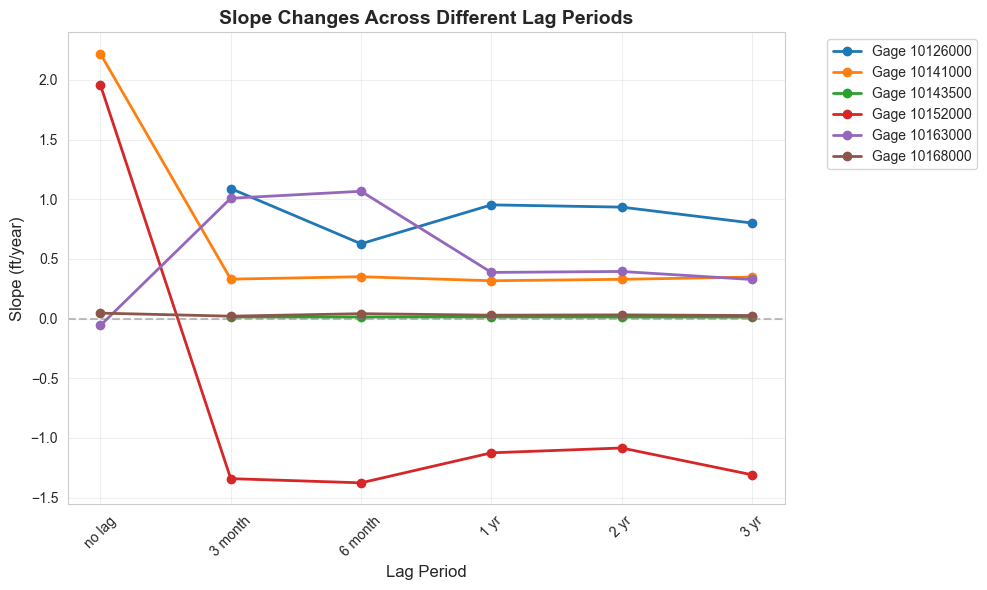

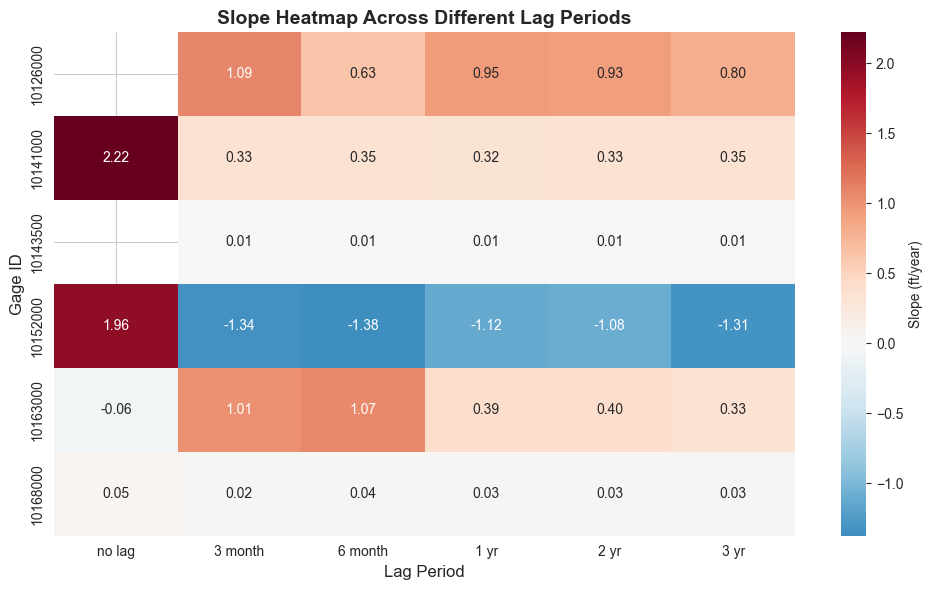

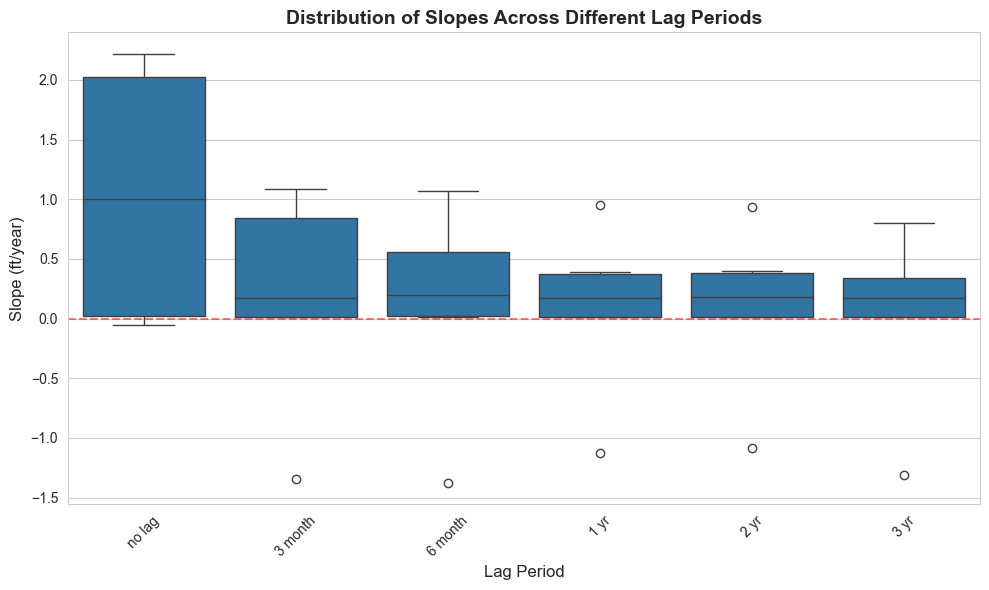

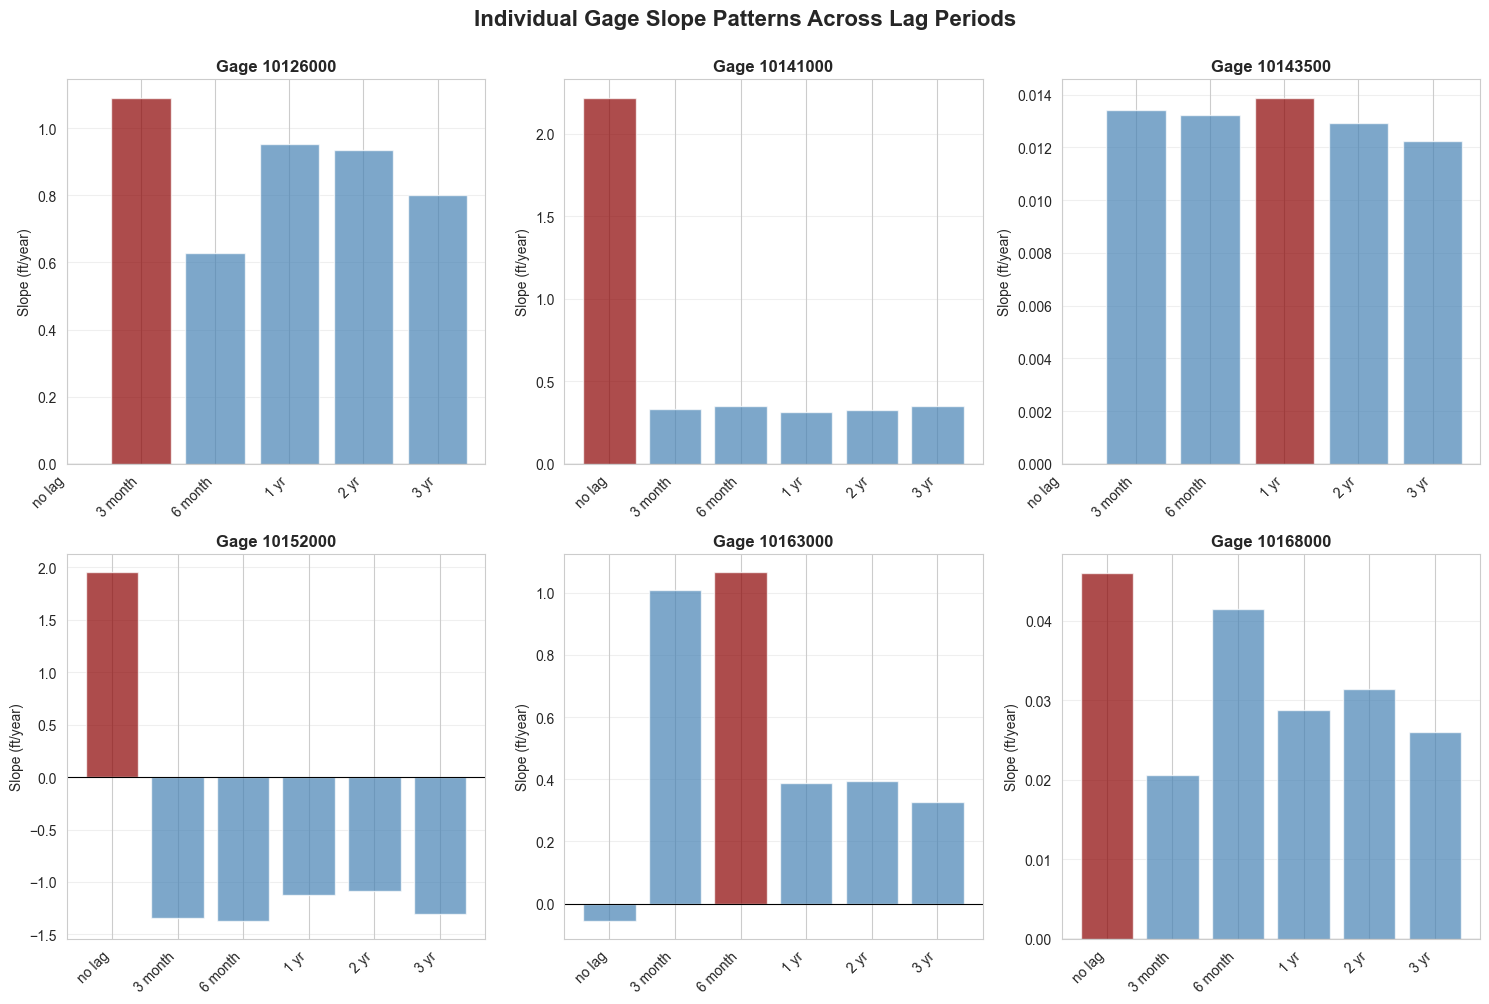


各Lag Period的统计摘要：

no lag:
  Mean: 1.041
  Median: 1.002
  Std: 1.214
  Min: -0.057
  Max: 2.219

3 month:
  Mean: 0.187
  Median: 0.176
  Std: 0.884
  Min: -1.341
  Max: 1.090

6 month:
  Mean: 0.121
  Median: 0.196
  Std: 0.832
  Min: -1.376
  Max: 1.067

1 yr:
  Mean: 0.096
  Median: 0.173
  Std: 0.688
  Min: -1.125
  Max: 0.953

2 yr:
  Mean: 0.103
  Median: 0.180
  Std: 0.671
  Min: -1.084
  Max: 0.934

3 yr:
  Mean: 0.034
  Median: 0.177
  Std: 0.718
  Min: -1.309
  Max: 0.801

每个站点slope的变异性（标准差）：
Gage 10126000: 0.175
Gage 10141000: 0.769
Gage 10143500: 0.001
Gage 10152000: 1.314
Gage 10163000: 0.434
Gage 10168000: 0.010


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 读取数据

# 转换为数值类型
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 确保gage_id是字符串格式，去掉.0
df['gage_id'] = df['gage_id'].astype(str).str.replace('.0', '', regex=False)

print("数据概览：")
print(df)
print("\n描述性统计：")
print(df.describe())

# =========================
# 图1: 每个站点的slope随lag变化的折线图
# =========================
fig, ax = plt.subplots(figsize=(10, 6))

lag_periods = ['no lag', '3 month', '6 month', '1 yr', '2 yr', '3 yr']
for idx, row in df.iterrows():
    values = row[lag_periods].values
    ax.plot(lag_periods, values, marker='o', label=f"Gage {row['gage_id']}", linewidth=2)

ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('Lag Period', fontsize=12)
ax.set_ylabel('Slope (ft/year)', fontsize=12)
ax.set_title('Slope Changes Across Different Lag Periods', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('slope_by_lag_lines.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================
# 图2: 热图展示
# =========================
fig, ax = plt.subplots(figsize=(10, 6))

# 准备热图数据
heatmap_data = df.set_index('gage_id')[lag_periods]
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            cbar_kws={'label': 'Slope (ft/year)'}, ax=ax)
ax.set_xlabel('Lag Period', fontsize=12)
ax.set_ylabel('Gage ID', fontsize=12)
ax.set_title('Slope Heatmap Across Different Lag Periods', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('slope_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================
# 图3: 箱线图 - 不同lag下slope的分布
# =========================
fig, ax = plt.subplots(figsize=(10, 6))

df_melted = df.melt(id_vars=['gage_id'], value_vars=lag_periods,
                    var_name='Lag Period', value_name='Slope')
sns.boxplot(data=df_melted, x='Lag Period', y='Slope', ax=ax)
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax.set_xlabel('Lag Period', fontsize=12)
ax.set_ylabel('Slope (ft/year)', fontsize=12)
ax.set_title('Distribution of Slopes Across Different Lag Periods', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('slope_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================
# 图4: 分面图 - 每个站点一个子图
# =========================
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, row in df.iterrows():
    ax = axes[idx]
    values = row[lag_periods].values.astype(float)  # 确保是float类型

    # 创建颜色列表，使用steelblue作为基础色
    colors = ['steelblue'] * len(values)
    if not np.all(np.isnan(values)):  # 确保有有效值
        # 找到绝对值最大的位置
        max_idx = np.nanargmax(np.abs(values))
        colors[max_idx] = 'darkred'

    ax.bar(range(len(lag_periods)), values, color=colors, alpha=0.7)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    ax.set_title(f"Gage {row['gage_id']}", fontweight='bold')
    ax.set_ylabel('Slope (ft/year)')
    ax.set_xticks(range(len(lag_periods)))
    ax.set_xticklabels(lag_periods, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('Individual Gage Slope Patterns Across Lag Periods',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('slope_individual_gages.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================
# 统计分析
# =========================
print("\n各Lag Period的统计摘要：")
for col in lag_periods:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.3f}")
    print(f"  Median: {df[col].median():.3f}")
    print(f"  Std: {df[col].std():.3f}")
    print(f"  Min: {df[col].min():.3f}")
    print(f"  Max: {df[col].max():.3f}")

# 计算每个站点slope变化的标准差（跨lag periods）
print("\n每个站点slope的变异性（标准差）：")
for idx, row in df.iterrows():
    std = row[lag_periods].std()
    print(f"Gage {row['gage_id']}: {std:.3f}")

## R-squared

In [99]:
df = pd.read_excel('../data/features/r_squared.xlsx')


In [95]:
df.head()

,gage_id,no lag,3 month,6 month,1 yr,2 yr,3 yr
0,10126000,NaN,0.000755,0.000237,0.000599,0.000575,0.000376
1,10141000,0.002255,0.019048,0.020874,0.014830,0.014783,0.015714
2,10143500,NaN,0.057364,0.045265,0.064873,0.055536,0.050820
3,10152000,0.021402,0.009658,0.009730,0.006366,0.005279,0.006573
4,10163000,0.007869,0.010875,0.012215,0.001615,0.001575,0.001035


R² 数据概览：
    gage_id    no lag   3 month   6 month      1 yr      2 yr      3 yr
0  10126000       NaN  0.000755  0.000237  0.000599  0.000575  0.000376
1  10141000  0.002255  0.019048  0.020874  0.014830  0.014783  0.015714
2  10143500       NaN  0.057364  0.045265  0.064873  0.055536  0.050820
3  10152000  0.021402  0.009658  0.009730  0.006366  0.005279  0.006573
4  10163000  0.007869  0.010875  0.012215  0.001615  0.001575  0.001035
5  10168000  0.769914  0.001302  0.004359  0.002958  0.004054  0.002724

描述性统计：
         no lag   3 month   6 month      1 yr      2 yr      3 yr
count  4.000000  6.000000  6.000000  6.000000  6.000000  6.000000
mean   0.200360  0.016500  0.015447  0.015207  0.013634  0.012874
std    0.379788  0.021136  0.016223  0.024873  0.021141  0.019427
min    0.002255  0.000755  0.000237  0.000599  0.000575  0.000376
25%    0.006465  0.003391  0.005702  0.001951  0.002195  0.001457
50%    0.014635  0.010267  0.010973  0.004662  0.004666  0.004648
75%    0.208530  

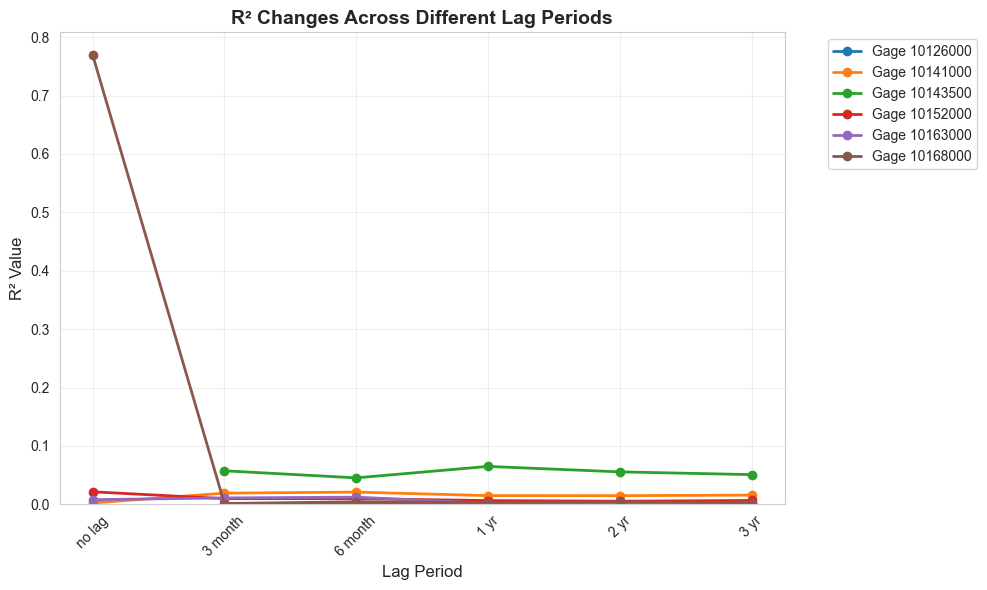

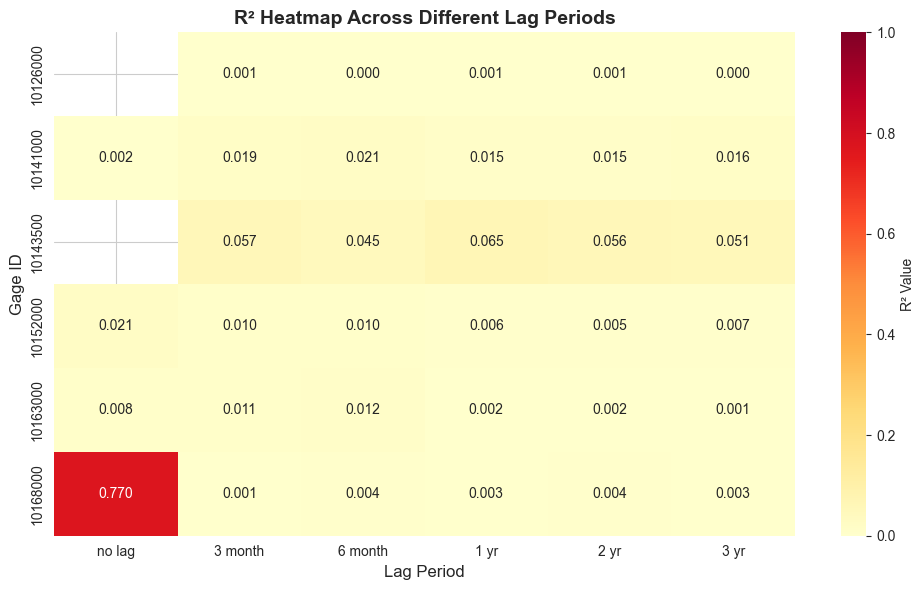

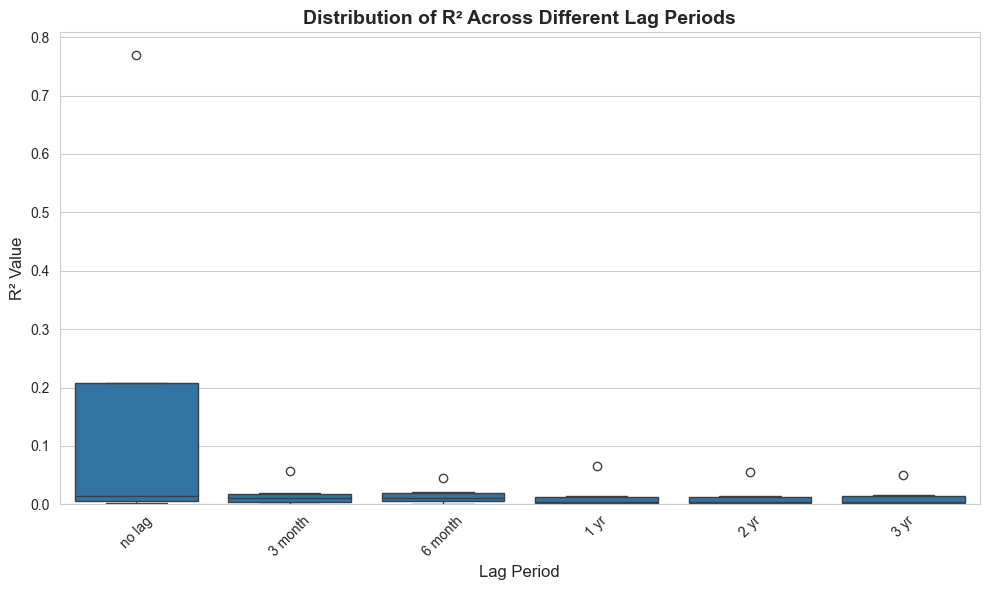

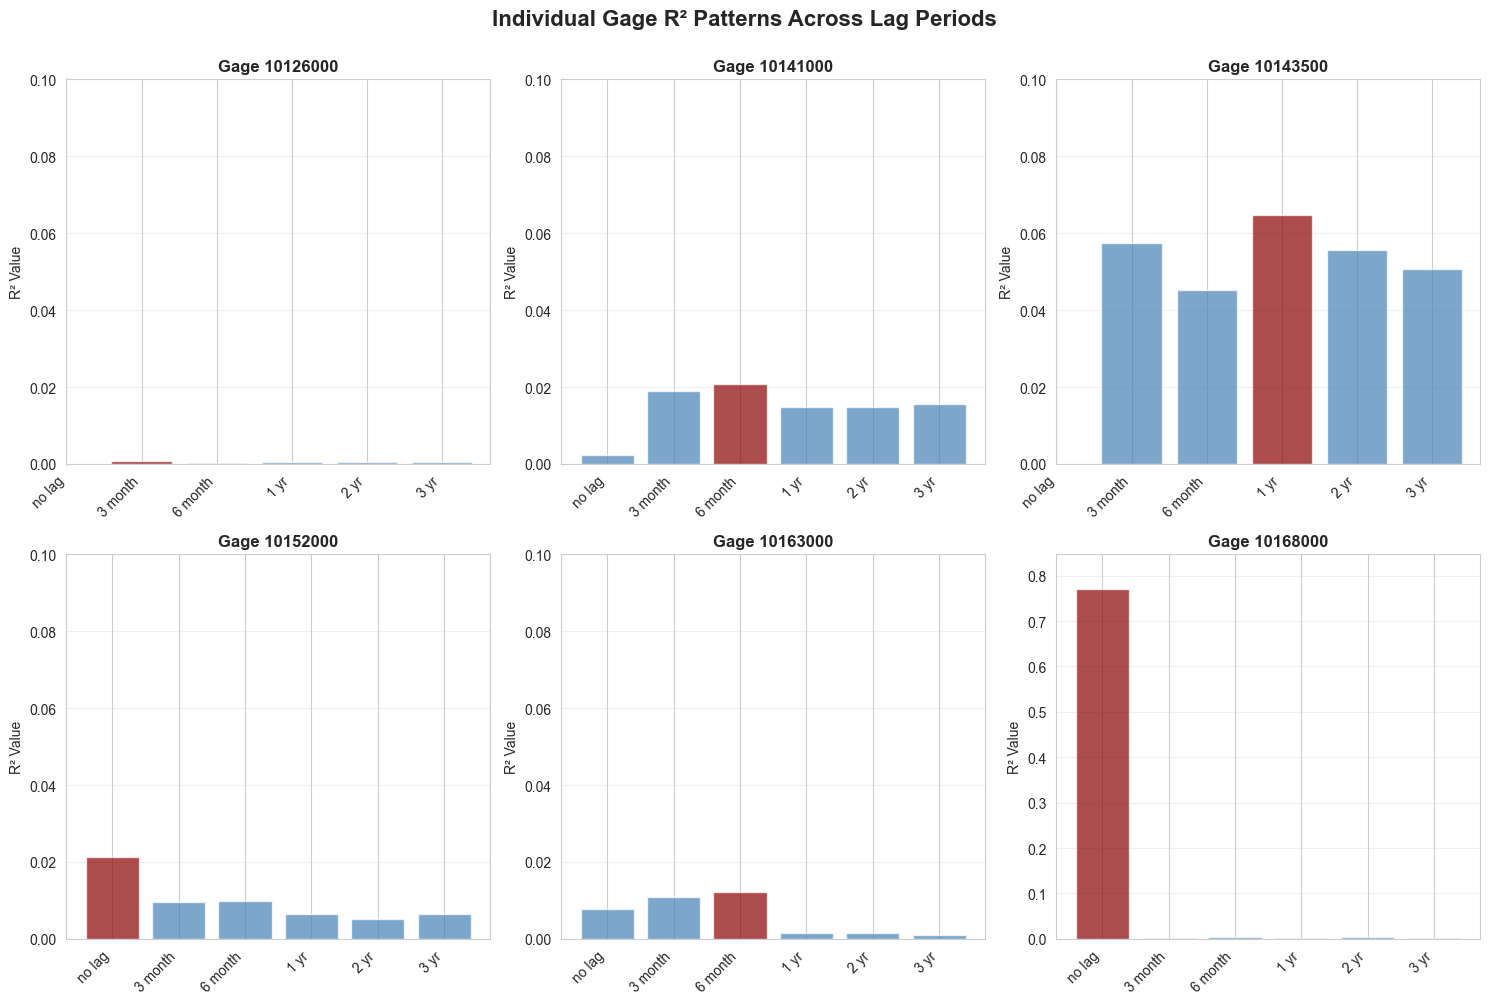


各Lag Period的统计摘要：

no lag:
  Mean: 0.2004
  Median: 0.0146
  Std: 0.3798
  Min: 0.0023
  Max: 0.7699

3 month:
  Mean: 0.0165
  Median: 0.0103
  Std: 0.0211
  Min: 0.0008
  Max: 0.0574

6 month:
  Mean: 0.0154
  Median: 0.0110
  Std: 0.0162
  Min: 0.0002
  Max: 0.0453

1 yr:
  Mean: 0.0152
  Median: 0.0047
  Std: 0.0249
  Min: 0.0006
  Max: 0.0649

2 yr:
  Mean: 0.0136
  Median: 0.0047
  Std: 0.0211
  Min: 0.0006
  Max: 0.0555

3 yr:
  Mean: 0.0129
  Median: 0.0046
  Std: 0.0194
  Min: 0.0004
  Max: 0.0508

每个站点的最佳Lag Period（最高R²）：
Gage 10126000: 3 month (R² = 0.0008)
Gage 10141000: 6 month (R² = 0.0209)
Gage 10143500: 1 yr (R² = 0.0649)
Gage 10152000: no lag (R² = 0.0214)
Gage 10163000: 6 month (R² = 0.0122)
Gage 10168000: no lag (R² = 0.7699)

每个站点R²的变异性（标准差）：
Gage 10126000: 0.0002
Gage 10141000: 0.0065
Gage 10143500: 0.0073
Gage 10152000: 0.0060
Gage 10163000: 0.0051
Gage 10168000: 0.3131

强相关性情况（R² > 0.5）：
  Gage 10168000, no lag: R² = 0.7699


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# 转换为数值类型
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 确保gage_id是字符串格式，去掉.0
df['gage_id'] = df['gage_id'].astype(str).str.replace('.0', '', regex=False)

print("R² 数据概览：")
print(df)
print("\n描述性统计：")
print(df.describe())

# =========================
# 图1: 每个站点的R²随lag变化的折线图
# =========================
fig, ax = plt.subplots(figsize=(10, 6))

lag_periods = ['no lag', '3 month', '6 month', '1 yr', '2 yr', '3 yr']
for idx, row in df.iterrows():
    values = row[lag_periods].values
    ax.plot(lag_periods, values, marker='o', label=f"Gage {row['gage_id']}", linewidth=2)

ax.set_xlabel('Lag Period', fontsize=12)
ax.set_ylabel('R² Value', fontsize=12)
ax.set_title('R² Changes Across Different Lag Periods', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_ylim(bottom=0)  # R²从0开始
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('rsquare_by_lag_lines.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================
# 图2: 热图展示
# =========================
fig, ax = plt.subplots(figsize=(10, 6))

# 准备热图数据
heatmap_data = df.set_index('gage_id')[lag_periods]
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='YlOrRd',
            cbar_kws={'label': 'R² Value'}, ax=ax, vmin=0, vmax=1)
ax.set_xlabel('Lag Period', fontsize=12)
ax.set_ylabel('Gage ID', fontsize=12)
ax.set_title('R² Heatmap Across Different Lag Periods', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('rsquare_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================
# 图3: 箱线图 - 不同lag下R²的分布
# =========================
fig, ax = plt.subplots(figsize=(10, 6))

df_melted = df.melt(id_vars=['gage_id'], value_vars=lag_periods,
                    var_name='Lag Period', value_name='R²')
sns.boxplot(data=df_melted, x='Lag Period', y='R²', ax=ax)
ax.set_xlabel('Lag Period', fontsize=12)
ax.set_ylabel('R² Value', fontsize=12)
ax.set_title('Distribution of R² Across Different Lag Periods', fontsize=14, fontweight='bold')
ax.set_ylim(bottom=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('rsquare_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================
# 图4: 分面图 - 每个站点一个子图
# =========================
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, row in df.iterrows():
    ax = axes[idx]
    values = row[lag_periods].values.astype(float)  # 确保是float类型

    # 创建颜色列表，最大值用深红色
    colors = ['steelblue'] * len(values)
    if not np.all(np.isnan(values)):  # 确保有有效值
        max_idx = np.nanargmax(values)  # 使用nanargmax忽略NaN
        colors[max_idx] = 'darkred'

    bars = ax.bar(range(len(lag_periods)), values, alpha=0.7, color=colors)
    ax.set_title(f"Gage {row['gage_id']}", fontweight='bold')
    ax.set_ylabel('R² Value')
    ax.set_xticks(range(len(lag_periods)))
    ax.set_xticklabels(lag_periods, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0, max(0.1, np.nanmax(values) * 1.1))  # 使用nanmax处理缺失值

plt.suptitle('Individual Gage R² Patterns Across Lag Periods',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('rsquare_individual_gages.png', dpi=300, bbox_inches='tight')
plt.show()

# =========================
# 统计分析
# =========================
print("\n各Lag Period的统计摘要：")
for col in lag_periods:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.4f}")
    print(f"  Median: {df[col].median():.4f}")
    print(f"  Std: {df[col].std():.4f}")
    print(f"  Min: {df[col].min():.4f}")
    print(f"  Max: {df[col].max():.4f}")

# 找出每个站点的最佳lag period
print("\n每个站点的最佳Lag Period（最高R²）：")
for idx, row in df.iterrows():
    values = row[lag_periods]
    best_lag = values.idxmax()
    best_r2 = values.max()
    print(f"Gage {row['gage_id']}: {best_lag} (R² = {best_r2:.4f})")

# 计算每个站点R²变化的标准差（跨lag periods）
print("\n每个站点R²的变异性（标准差）：")
for idx, row in df.iterrows():
    std = row[lag_periods].std()
    print(f"Gage {row['gage_id']}: {std:.4f}")

# 特别标注R² > 0.5的情况（通常认为是强相关）
print("\n强相关性情况（R² > 0.5）：")
strong_corr = []
for idx, row in df.iterrows():
    for col in lag_periods:
        if row[col] > 0.5:
            strong_corr.append(f"Gage {row['gage_id']}, {col}: R² = {row[col]:.4f}")
if strong_corr:
    for item in strong_corr:
        print(f"  {item}")
else:
    print("  无R² > 0.5的情况")